In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# First case: transform 1/x^2 in uniform

In [72]:
n_examples = 100000
interval = (1, 10)
interval_length = interval[1] - interval[0]
x_prime = np.random.uniform(*interval, n_examples)
w_prime = np.ones(n_examples)*9/n_examples

x_span = np.linspace(*interval, 100)

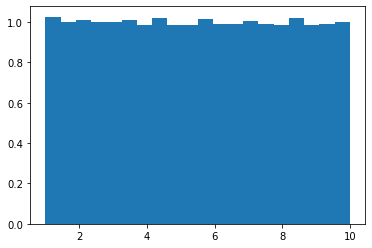

In [73]:
bins = 20
bin_size = interval_length/bins
plt.hist(x_prime, bins=bins, weights=w_prime/bin_size);

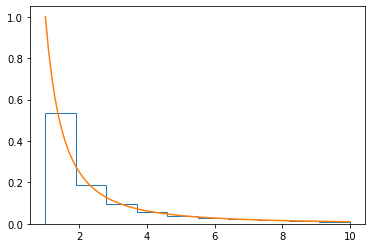

In [78]:
bins = 10
bin_size = interval_length/bins
plt.hist(x_prime, weights=w_prime*x_prime**(-2)/bin_size, bins=bins, histtype='step');
plt.plot(x_span, x_span**(-2))

In [75]:
# Second case: transform 1/x^2 in 1/x - with uniform weights

In [107]:
def acceptance_rejection(f, interval, max_height, n_trials):
    x_i = np.random.uniform(*interval, n_trials)
    y_i = np.random.uniform(0, max_height, n_trials)
    x_final = x_i[y_i < f(x_i)]
    area_box = max_height * (interval[1] - interval[0])
    w_final = np.ones(len(x_final)) * area_box / n_trials
    return x_final, w_final

In [146]:
f_gen = lambda x: x**(-2)
x_i, w_i = acceptance_rejection(f_gen, [1,10], 1, 1000000)

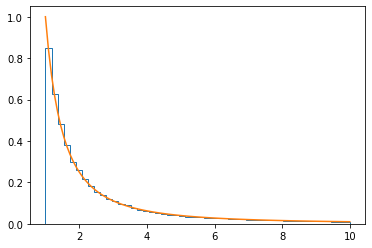

In [141]:
bins = 50
interval_length = (x_i.max() - x_i.min())
bin_size = interval_length/bins
plt.hist(x_i, weights=w_i/bin_size, bins=bins, histtype='step');
plt.plot(x_span, x_span**(-2))

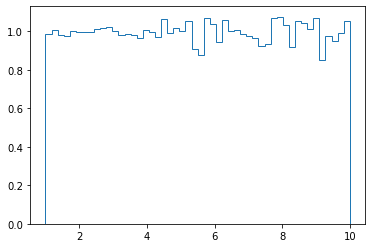

In [147]:
w_i_prime = w_i /f_gen(x_i)
plt.hist(x_i, weights=w_i_prime/bin_size, bins=bins, histtype='step');

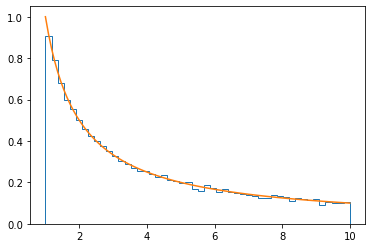

In [150]:
g = lambda x: x**(-1)
w_i_prime2 = w_i * g(x_i) / f_gen(x_i)
plt.hist(x_i, weights=w_i_prime2/bin_size, bins=bins, histtype='step');
plt.plot(x_span, g(x_span))

In [ ]:
# The answer is yes and it can be proven easily moving to a uniform a